In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data=load_breast_cancer()

In [4]:
import pandas as pd

In [7]:
dataset=pd.DataFrame(data.data,columns=data.feature_names)

In [8]:
dataset["ouput_disease"]=pd.DataFrame(data.target)

In [9]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,ouput_disease
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
dataset["ouput_disease"].value_counts()

ouput_disease
1    357
0    212
Name: count, dtype: int64

In [13]:
dataset.corr()["ouput_disease"]

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [14]:
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
ouput_disease              0
dtype: int64

In [19]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [20]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss=StandardScaler()

In [27]:
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [29]:
import tensorflow as tf
from tensorflow import keras 

In [30]:
x_train.shape

(455, 30)

In [35]:
model=keras.Sequential([
    keras.layers.Dense(30,input_shape=(30,),activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [36]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [68]:
history=model.fit(x_train,y_train,epochs=10,validation_data=[x_test,y_test])

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3838 - loss: 93.4093 - val_accuracy: 0.6316 - val_loss: 28.5955
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6092 - loss: 18.3287 - val_accuracy: 0.8947 - val_loss: 2.0289
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8434 - loss: 3.0092 - val_accuracy: 0.9035 - val_loss: 0.4754
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8960 - loss: 1.0425 - val_accuracy: 0.9386 - val_loss: 0.4439
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9001 - loss: 1.0996 - val_accuracy: 0.9386 - val_loss: 0.4213
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9162 - loss: 0.9214 - val_accuracy: 0.9386 - val_loss: 0.3997
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9105 - loss: 0.8683 - val_accuracy: 0.9386 - val_loss: 0.3604
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8989 - loss: 0.8537 - val_accuracy: 0.9474 - val_

In [69]:
history2=model.fit(x_train_scaled,y_train,epochs=10,validation_data=[x_test_scaled,y_test])

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9926 - loss: 0.0299 - val_accuracy: 0.9561 - val_loss: 0.0959
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9849 - loss: 0.0429 - val_accuracy: 0.9649 - val_loss: 0.0907
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9980 - loss: 0.0281 - val_accuracy: 0.9737 - val_loss: 0.0895
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9972 - loss: 0.0253 - val_accuracy: 0.9737 - val_loss: 0.0898
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9964 - loss: 0.0264 - val_accuracy: 0.9737 - val_loss: 0.0900
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9987 - loss: 0.0247 - val_accuracy: 0.9737 - val_loss: 0.0905
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9984 - loss: 0.0245 - val_accuracy: 0.9737 - val_loss: 0.0915
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9993 - loss: 0.0212 - val_accuracy: 0.9737 - val_loss

In [70]:
import matplotlib.pyplot as plt 

Text(0.5, 0, 'accuracy')

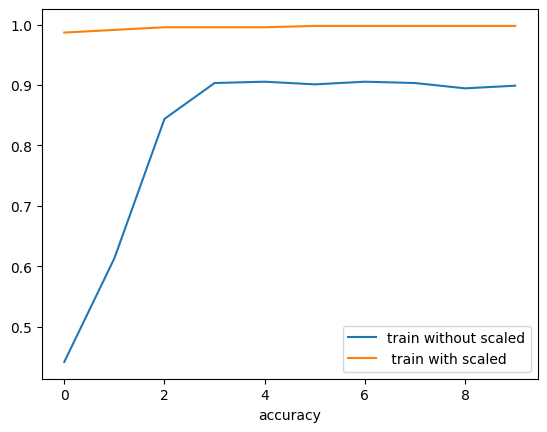

In [71]:
plt.plot(history.history["accuracy"])
plt.plot(history2.history["accuracy"])
plt.legend(["train without scaled"," train with scaled"])
plt.xlabel("accuracy")

Text(0.5, 0, 'accuracy')

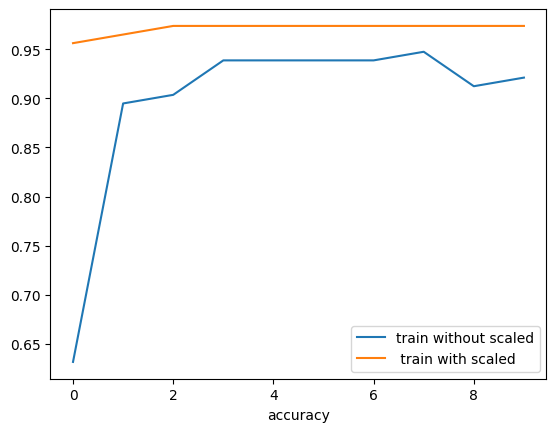

In [76]:
plt.plot(history.history["val_accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.legend(["train without scaled"," train with scaled"])
plt.xlabel("accuracy")

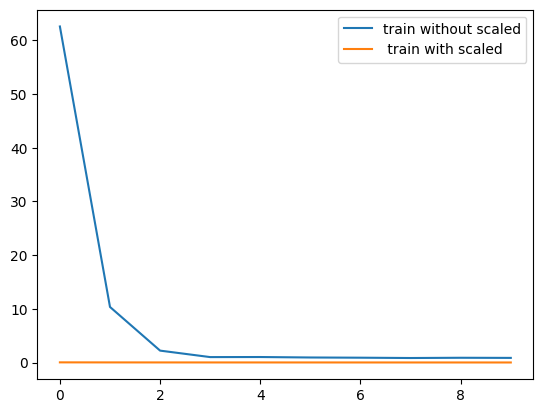

In [74]:
plt.plot(history.history["loss"])
plt.plot(history2.history["loss"])
plt.legend(["train without scaled"," train with scaled"])


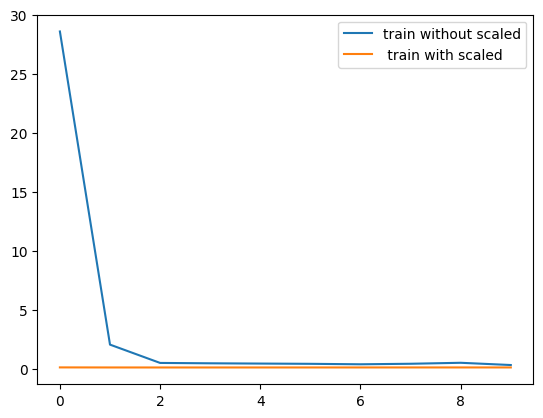

In [75]:
plt.plot(history.history["val_loss"])
plt.plot(history2.history["val_loss"])
plt.legend(["train without scaled"," train with scaled"])


In [77]:
model.evaluate(x_test_scaled,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9645 - loss: 0.1235


[0.09158582985401154, 0.9736841917037964]

In [80]:
y_pred=model.predict(x_test_scaled)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[9.7091210e-01],
       [6.0709619e-05],
       [1.2869826e-03],
       [9.9985892e-01],
       [9.9998647e-01],
       [4.3214578e-11],
       [1.2316053e-08],
       [5.4199547e-02],
       [1.3991201e-01],
       [9.9996072e-01],
       [8.8602829e-01],
       [2.4903923e-02],
       [9.9709934e-01],
       [3.5398373e-01],
       [9.9991727e-01],
       [5.6862383e-04],
       [9.9986821e-01],
       [9.9999815e-01],
       [9.9999994e-01],
       [1.7126602e-06],
       [9.8278689e-01],
       [9.9898541e-01],
       [4.1932120e-09],
       [9.9998939e-01],
       [9.9973041e-01],
       [9.9996614e-01],
       [9.9988937e-01],
       [9.9580240e-01],
       [9.9969536e-01],
       [8.2473271e-06],
       [9.9969858e-01],
       [9.9999082e-01],
       [9.9956268e-01],
       [9.9963033e-01],
       [9.9998462e-01],
       [9.9964917e-01],
       [2.3740320e-01],
       [9.9861640e-01],
       [3.6992543e-04],
       [9.7823620e-01],
       [9.9998343e-01],
       [1.982734

In [81]:
import numpy as np

In [109]:
threshold = 0.5
y_predict = []

for i in range(len(y_pred)): 
    if y_pred[i] <= threshold:
        y_predict.append(0)
    else:  
        y_predict.append(1)

print(y_predict)  


    

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9736842105263158

In [112]:
data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [149]:
def predict_value(x):
    x_array=np.array(x)
    x_shape=x_array.reshape(1,-1)
    y_pred=model.predict(x_shape)
    threshold = 0.5
    y_predict = []

    for i in range(len(y_pred)): 
        if y_pred[i] <= threshold:
            y_predict.append(0)
            print("malignant tumor")
        else:  
            y_predict.append(1)
            print("Benign tumor")
    
    return y_predict 

    
    

In [154]:
predict_value(data.data[223])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
malignant tumor


[0]

In [153]:
data.target[21]

1

In [151]:
predict_value(data.data[21])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Benign tumor


[1]

In [152]:
predict_value(data.data[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
malignant tumor


[0]

1